**Two Tasks**
Optimal fraction of time that the high price and the low price should be offered based on a policy that...
1) Doesn't depend on how many spots are open
- decides randomly and uses the probability of a person accepting a spot for high and low price
2) Depends on how many spots are open 
- manually decides high or low depending on how many spots are filled, can specify a threshold

**Task 1**

In [3]:
import numpy as np

def optimal_breakdown(days, spots=8, p_stay=0.08, high=1.4, prob_high=0.145, low=1, prob_low=0.6, prob_high_days=0.5):
    revenue = 0
    # Array for occupancy
    occupancy = np.zeros(spots)

    for day in range(days):
        # Decrease as each day passes
        occupancy[occupancy > 0] -= 1

        # High or low price each day
        if np.random.rand() <= prob_high_days:
            price = high
            prob_price = prob_high
        else:
            price = low
            prob_price = prob_low

        # Check if spots are free
        for i in range(spots):
            if occupancy[i] <= 0:  
                if np.random.rand() <= prob_price:
                    # How many days a truck stays
                    stay_duration = np.random.geometric(p_stay)
                    occupancy[i] = stay_duration 
                    revenue += price*stay_duration 
                break

    return revenue

#Simulation
days = 365  
simulations = 100  

test_proportions = np.linspace(0, 1, 11) 
grid_search_results_corrected = {}

for proportion in test_proportions:
    average_revenue = np.mean([optimal_breakdown(days, prob_high_days=proportion) for _ in range(simulations)])
    grid_search_results_corrected[proportion] = average_revenue

for prop, rev in grid_search_results_corrected.items():
    print(f"Proportion of high price days: {prop:.1f}, Average Revenue: ${rev:.2f}")

Proportion of high price days: 0.0, Average Revenue: $2342.19
Proportion of high price days: 0.1, Average Revenue: $2245.91
Proportion of high price days: 0.2, Average Revenue: $2165.69
Proportion of high price days: 0.3, Average Revenue: $2059.28
Proportion of high price days: 0.4, Average Revenue: $1963.70
Proportion of high price days: 0.5, Average Revenue: $1769.05
Proportion of high price days: 0.6, Average Revenue: $1572.86
Proportion of high price days: 0.7, Average Revenue: $1478.54
Proportion of high price days: 0.8, Average Revenue: $1295.24
Proportion of high price days: 0.9, Average Revenue: $1082.74
Proportion of high price days: 1.0, Average Revenue: $915.11


In [4]:
#Simulation
days = 365  
simulations = 1000  
test_proportions = np.linspace(0, 1, 11) 
grid_search_results_corrected = {}

for proportion in test_proportions:
    average_revenue = np.mean([optimal_breakdown(days, spots=8, p_stay=0.08, high=3, prob_high=0.1, low=2.5, prob_low=0.6) for _ in range(simulations)])
    grid_search_results_corrected[proportion] = average_revenue

for prop, rev in grid_search_results_corrected.items():
    print(f"Proportion of high price days: {prop:.1f}, Average Revenue: ${rev:.2f}")

Proportion of high price days: 0.0, Average Revenue: $4002.18
Proportion of high price days: 0.1, Average Revenue: $4021.43
Proportion of high price days: 0.2, Average Revenue: $4041.70
Proportion of high price days: 0.3, Average Revenue: $4032.60
Proportion of high price days: 0.4, Average Revenue: $4026.21
Proportion of high price days: 0.5, Average Revenue: $4021.91
Proportion of high price days: 0.6, Average Revenue: $4016.18
Proportion of high price days: 0.7, Average Revenue: $4047.49
Proportion of high price days: 0.8, Average Revenue: $4025.56
Proportion of high price days: 0.9, Average Revenue: $4019.55
Proportion of high price days: 1.0, Average Revenue: $4028.79


In [5]:
days = 365
simulations = 1000
test_prices = [(2, 1), (2, 1.5), (2, 2), (2.5, 1), (2.5, 1.5), (2.5, 2), (3, 1), (3, 1.5), (3, 2)]
grid_search_results = {}

for high, low in test_prices:
    average_revenue = np.mean([optimal_breakdown(days, high=high, low=low) for _ in range(simulations)])
    grid_search_results[(high, low)] = average_revenue

for prices, rev in grid_search_results.items():
    print(f"High price: {prices[0]}, Low price: {prices[1]}, Average Revenue: ${rev:.2f}")

High price: 2, Low price: 1, Average Revenue: $1983.69
High price: 2, Low price: 1.5, Average Revenue: $2645.00
High price: 2, Low price: 2, Average Revenue: $3308.23
High price: 2.5, Low price: 1, Average Revenue: $2140.98
High price: 2.5, Low price: 1.5, Average Revenue: $2799.88
High price: 2.5, Low price: 2, Average Revenue: $3460.75
High price: 3, Low price: 1, Average Revenue: $2294.03
High price: 3, Low price: 1.5, Average Revenue: $2966.74
High price: 3, Low price: 2, Average Revenue: $3650.54


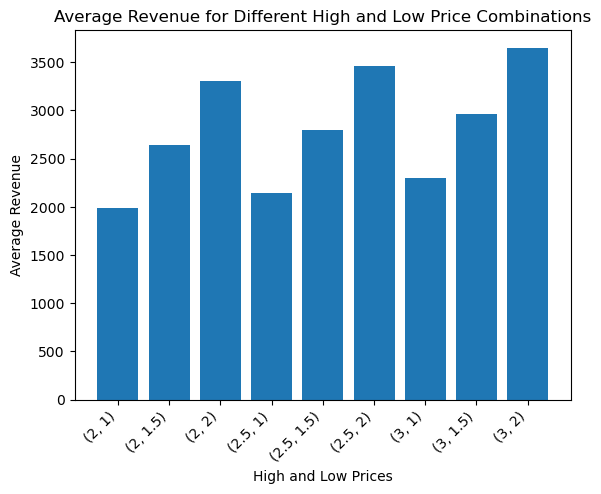

In [6]:
import matplotlib.pyplot as plt

prices = [str(prices) for prices in test_prices]
revenues = list(grid_search_results.values())

plt.bar(prices, revenues)
plt.xlabel('High and Low Prices')
plt.ylabel('Average Revenue')
plt.title('Average Revenue for Different High and Low Price Combinations')
plt.xticks(rotation=45, ha='right')
plt.show()

**Task 2**

In [7]:
# Same function but dynamically changing based on how many spots are available, rather than random

def optimal_breakdown_dynamic(days, spots=8, p_stay=0.08, high=1.4, prob_high=0.145, low=1, prob_low=0.6, prob_high_days=0.5, number_filled=5):
    revenue = 0
    # Array for occupancy
    occupancy = np.zeros(spots)

    for day in range(days):
        # Decrease as each day passes
        occupancy[occupancy > 0] -= 1

        # High or low price each day
        number_filled_spots = np.count_nonzero(occupancy > 0)
            
        #if np.random.rand() <= prob_high_days:
        if number_filled_spots >= number_filled:
            price = high
            prob_price = prob_high
        else:
            price = low
            prob_price = prob_low

        # Check if spots are free
        for i in range(spots):
            if occupancy[i] <= 0:  
                if np.random.rand() <= prob_price:
                    # How many days a truck stays
                    stay_duration = np.random.geometric(p_stay)
                    occupancy[i] = stay_duration 
                    revenue += price*stay_duration 
                    break

    return revenue


In [8]:
# Simulation parameters
days = 365
simulations = 1000
number_filled_values = [1,2,3,4,5,6,7,8]

# Perform simulations for different number_filled values
for number_filled in number_filled_values:
    average_revenue = np.mean([optimal_breakdown_dynamic(days, number_filled=number_filled) for _ in range(simulations)])
    print(f"Number Filled: {number_filled}, Average Revenue: ${average_revenue:.2f}")

Number Filled: 1, Average Revenue: $2595.41
Number Filled: 2, Average Revenue: $2585.91
Number Filled: 3, Average Revenue: $2568.32
Number Filled: 4, Average Revenue: $2551.46
Number Filled: 5, Average Revenue: $2547.40
Number Filled: 6, Average Revenue: $2566.60
Number Filled: 7, Average Revenue: $2626.27
Number Filled: 8, Average Revenue: $2679.94


In [9]:
days = 365
simulations = 1000
test_prices = [(2, 1), (2, 1.5), (2, 2), (2.5, 1), (2.5, 1.5), (2.5, 2), (3, 1), (3, 1.5), (3, 2)]
grid_search_results = {}

for high, low in test_prices:
    average_revenue = np.mean([optimal_breakdown_dynamic(days, high=high, low=low) for _ in range(simulations)])
    grid_search_results[(high, low)] = average_revenue

for prices, rev in grid_search_results.items():
    print(f"High price: {prices[0]}, Low price: {prices[1]}, Average Revenue: ${rev:.2f}")

High price: 2, Low price: 1, Average Revenue: $3170.98
High price: 2, Low price: 1.5, Average Revenue: $3707.22
High price: 2, Low price: 2, Average Revenue: $4242.76
High price: 2.5, Low price: 1, Average Revenue: $3715.39
High price: 2.5, Low price: 1.5, Average Revenue: $4243.19
High price: 2.5, Low price: 2, Average Revenue: $4773.21
High price: 3, Low price: 1, Average Revenue: $4227.96
High price: 3, Low price: 1.5, Average Revenue: $4772.16
High price: 3, Low price: 2, Average Revenue: $5288.63


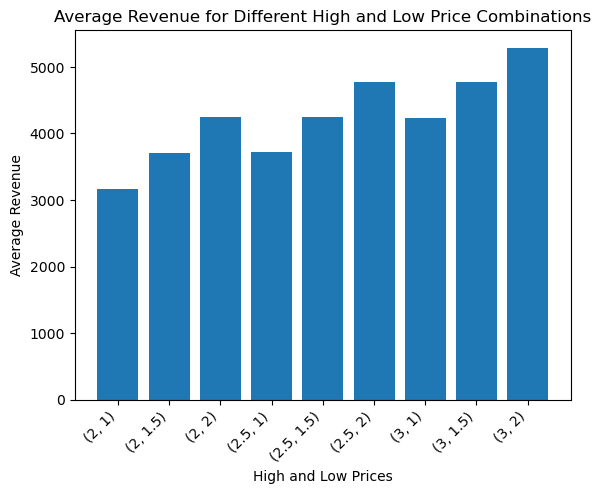

In [10]:
import matplotlib.pyplot as plt

prices = [str(prices) for prices in test_prices]
revenues = list(grid_search_results.values())

plt.bar(prices, revenues)
plt.xlabel('High and Low Prices')
plt.ylabel('Average Revenue')
plt.title('Average Revenue for Different High and Low Price Combinations')
plt.xticks(rotation=45, ha='right')
plt.show()

**Including Average Occupancy Over Time (for the first case)**

In [11]:
import numpy as np

def optimal_breakdown(days, spots=8, p_stay=0.08, high=2, prob_high=0.2, low=1, prob_low=0.6, prob_high_days=0.5):
    revenue = 0
    total_spots = spots*365
    average_spots = 0 
    # Array for occupancy
    occupancy = np.zeros(spots)

    for day in range(days):
        # Decrease as each day passes
        occupancy[occupancy > 0] -= 1

        # High or low price each day
        if np.random.rand() <= prob_high_days:
            price = high
            prob_price = prob_high
        else:
            price = low
            prob_price = prob_low

        # Check if spots are free
        for i in range(spots):
            if occupancy[i] <= 0:  
                if np.random.rand() <= prob_price:
                    # How many days a truck stays
                    stay_duration = np.random.geometric(p_stay)
                    average_spots += stay_duration
                    occupancy[i] = stay_duration 
                    revenue += price*stay_duration 
                break

    average_spots = average_spots/total_spots
    print(average_spots)
    return revenue

#Simulation
days = 365  
simulations = 1  

test_proportions = np.linspace(0, 1, 11) 
grid_search_results_corrected = {}

for proportion in test_proportions:
    average_revenue = np.mean([optimal_breakdown(days, prob_high_days=proportion) for _ in range(simulations)])
    grid_search_results_corrected[proportion] = average_revenue

for prop, rev in grid_search_results_corrected.items():
    print(f"Proportion of high price days: {prop:.1f}, Average Revenue: ${rev:.2f}")

0.8202054794520548
0.7976027397260274
0.7565068493150685
0.6845890410958904
0.6291095890410959
0.575
0.5136986301369864
0.4363013698630137
0.4791095890410959
0.4075342465753425
0.39863013698630134
Proportion of high price days: 0.0, Average Revenue: $2395.00
Proportion of high price days: 0.1, Average Revenue: $2392.00
Proportion of high price days: 0.2, Average Revenue: $2290.00
Proportion of high price days: 0.3, Average Revenue: $2203.00
Proportion of high price days: 0.4, Average Revenue: $2121.00
Proportion of high price days: 0.5, Average Revenue: $2065.00
Proportion of high price days: 0.6, Average Revenue: $1890.00
Proportion of high price days: 0.7, Average Revenue: $1725.00
Proportion of high price days: 0.8, Average Revenue: $2278.00
Proportion of high price days: 0.9, Average Revenue: $2167.00
Proportion of high price days: 1.0, Average Revenue: $2328.00
